<a href="https://colab.research.google.com/github/student-monika/Marvel_tasks/blob/main/Marvel_L2_Task_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

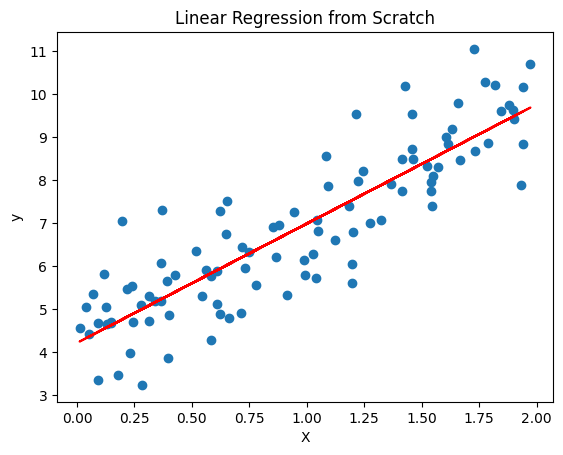

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class LinearRegression:
    def __init__(self):
        self.coefficients = None

    def fit(self, X, y):
        # Add bias term
        X_b = np.c_[np.ones((X.shape[0], 1)), X]  # Add x0 = 1
        # Normal equation to compute optimal coefficients
        self.coefficients = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y

    def predict(self, X):
        X_b = np.c_[np.ones((X.shape[0], 1)), X]  # Add x0 = 1
        return X_b @ self.coefficients

# Testing the Linear Regression
if __name__ == "__main__":
    # Generate some random data
    np.random.seed(42)
    X = 2 * np.random.rand(100, 1)
    y = 4 + 3 * X + np.random.randn(100, 1)

    model = LinearRegression()
    model.fit(X, y)
    predictions = model.predict(X)

    # Plotting
    plt.scatter(X, y)
    plt.plot(X, predictions, color='red')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.title('Linear Regression from Scratch')
    plt.show()


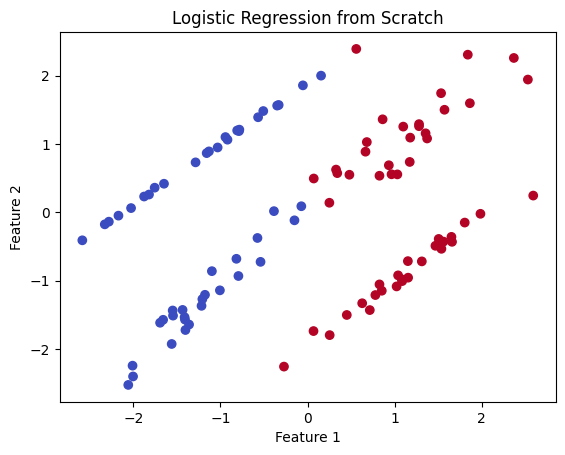

In [ ]:
class LogisticRegression:
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        # Add bias term
        X_b = np.c_[np.ones((X.shape[0], 1)), X]
        self.weights = np.zeros(X_b.shape[1])

        for _ in range(self.n_iterations):
            linear_model = X_b @ self.weights
            y_predicted = self.sigmoid(linear_model)
            gradient = X_b.T @ (y_predicted - y) / y.size
            self.weights -= self.learning_rate * gradient

    def predict(self, X):
        X_b = np.c_[np.ones((X.shape[0], 1)), X]
        linear_model = X_b @ self.weights
        y_predicted = self.sigmoid(linear_model)
        return np.where(y_predicted >= 0.5, 1, 0)

# Testing the Logistic Regression
if __name__ == "__main__":
    # Generate some random binary classification data
    from sklearn.datasets import make_classification
    X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, random_state=42)

    model = LogisticRegression()
    model.fit(X, y)
    predictions = model.predict(X)

    # Plotting
    plt.scatter(X[:, 0], X[:, 1], c=predictions, cmap='coolwarm')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Logistic Regression from Scratch')
    plt.show()


My Model MSE: 0.6536319572710421
Scikit-learn Model MSE: 0.653631957271042


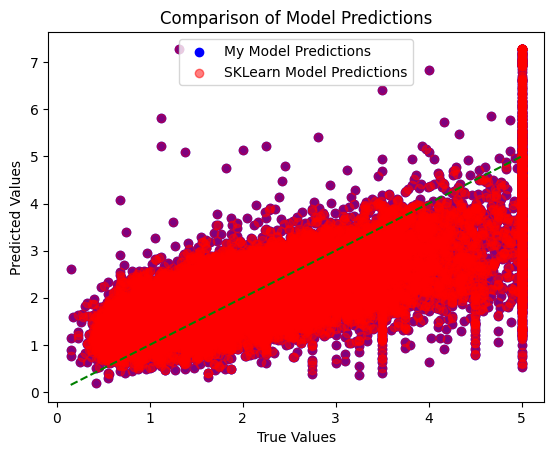

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression as SKLinearRegression
from sklearn.metrics import mean_squared_error

# Load the California housing dataset
california = fetch_california_housing()
X = california.data
y = california.target  # This is the target variable

# Convert to DataFrame for easier manipulation
data = pd.DataFrame(X, columns=california.feature_names)

# Selecting specific features from the dataset
X = data[['MedInc', 'HouseAge']].values  # Using MedInc and HouseAge as features

# Your custom Linear Regression model
class LinearRegression:
    def __init__(self):
        self.coefficients = None

    def fit(self, X, y):
        # Add bias term
        X_b = np.c_[np.ones((X.shape[0], 1)), X]  # Add x0 = 1
        # Normal equation to compute optimal coefficients
        self.coefficients = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y

    def predict(self, X):
        X_b = np.c_[np.ones((X.shape[0], 1)), X]  # Add x0 = 1
        return X_b @ self.coefficients

# Train your model
my_model = LinearRegression()
my_model.fit(X, y)  # Fit using the y array as the target
my_predictions = my_model.predict(X)

# Scikit-learn model
sk_model = SKLinearRegression()
sk_model.fit(X, y)  # Fit using the y array as the target
sk_predictions = sk_model.predict(X)

# Compare results
print("My Model MSE:", mean_squared_error(y, my_predictions))
print("Scikit-learn Model MSE:", mean_squared_error(y, sk_predictions))

# Optional: Visualize predictions
plt.scatter(y, my_predictions, color='blue', label='My Model Predictions')
plt.scatter(y, sk_predictions, color='red', label='SKLearn Model Predictions', alpha=0.5)
plt.plot([min(y), max(y)], [min(y), max(y)], color='green', linestyle='--')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Comparison of Model Predictions')
plt.legend()
plt.show()
